<font size="+3"><strong>8.1. Getting data from APIs</strong></font>

You can't build a model without data, right? In previous projects, we've worked with data stored in files (like a CSV) or databases (like MongoDB or SQL). In this project, we're going to get our data from a web server using an API. So in this lesson, we'll learn what an API is and how to extract data from one. We'll also work on transforming our data into a manageable format. Let's get to it!

In [11]:
!pip install pydantic-settings

     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 65.2/65.2 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/381.9 kB ? eta -:--:--
   -------------------------------- ------- 307.2/381.9 kB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 381.9/381.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.9 MB 14.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.9 MB 3.9 MB/s eta 0:00:01
   ------------------------ --------------- 1.2/1.9 MB 1.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.9 MB 2.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.9 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------  1.9/1.9 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------  1.9/1.9 MB 2.0 MB/s eta 0:00:01
   ------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightning 2.0.8 requires pydantic<2.2.0,>=1.7.4, but you have pydantic 2.5.2 which is incompatible.


In [12]:
from pydantic_settings import BaseSettings

In [13]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Accessing APIs Through a URL

In this lesson, we'll extract stock market information from the [AlphaVantage](https://alphavantage.co/) API. To get a sense of how an API works, consider the URL below. Take a moment to read the text of the link itself, then click on it and examine the data that appears in your browser. What's the format of the data? What data is included? How is it organized? 

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo

Notice that this URL has several components. Let's break them down one-by-one.

| URL | Component |
|:--- | :-------- |
| `https://www.alphavantage.co` | This is the **hostname** or **base URL**. It is the web address for the server where we can get our stock data. |
| `/query` | This is the **path**. Most APIs have lots of different operations they can do. The path is the name of the particular operation we want to access. |
| `?` |  This question mark denotes that everything that follows in the URL is a **parameter**. Each parameter is separated by a `&` character. These parameters provide additional information that will change the operation's behavior. This is similar to the way we pass **arguments** into functions in Python. |
| `function=TIME_SERIES_DAILY` | Our first parameter uses the `function` keyword. The value is `TIME_SERIES_DAILY`. In this case, we're asking for **daily** stock data. |
| `symbol=IBM` | Our second parameter uses the `symbol` keyword. So we're asking for a data on a stock whose [**ticker symbol**](https://en.wikipedia.org/wiki/Ticker_symbol) is `IBM`. |
| `apikey=demo` | Much in the same way you need a password to access some websites, an **API key** or **API token** is the password that you'll use to access the API. |

Now that we have a sense of the components of URL that gets information from AlphaVantage, let's create our own for a different stock.

**Task 8.1.1:** Using the URL above as a model, create a new URL to get the data for [Ambuja Cement](https://www.ambujacement.com/). The ticker symbol for this company is: `"AMBUJACEM.BSE"`.

- [What's a web API?](../%40textbook/22-apis.ipynb)

In [14]:
url = (
    "https://www.alphavantage.co/query?"
    "function=TIME_SERIES_DAILY_ADJUSTED&"
    "symbol=AMBUJACEM.BSE&"
    "apikey=demo"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMBUJACEM.BSE&apikey=demo'

Oh no! A problem. It looks like we need our own API key access the data. Fortunately, WQU provides you one in your [profile settings](https://learn.wqu.edu/settings/api-keys).

As you can imagine, an API key is information that should be kept secret, so it's a bad idea to include it in our application code. When it comes to sensitive information like this, developers and data scientists store it as an [environment variable](https://en.wikipedia.org/wiki/Environment_variable) that's kept in a `.env` file. 

**Task 8.1.2:** Get your API key and save it in your `.env` file.

- [What's an API key?](../%40textbook/22-apis.ipynb#Making-an-HTTP-Request)
- [What's an environment variable?](../%40textbook/22-apis.ipynb#Declaring-Environment-Variables)

Now that we've stored our API key, we need to import it into our code base. This is commonly done by creating a `config` module.

**Task 8.1.3:** Import the `settings` variable from the `config` module. Then use the `dir` command to see what attributes it has.

In [16]:
# Import settings
from config import settings

# Use `dir` to list attributes
dir(settings)

c:\Users\Danjuma Ahmed H\miniconda3\Lib\site-packages\pydantic\_internal\_fields.py:127: UserWarning: Field "model_directory" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ('settings_',)`.
  class_vars: set[str] = set()


['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_validator__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',

In [17]:
settings.db_name

'stocks.sqlite'

Beautiful! We have an API key. Since the key comes from WQU, we'll need to use a different base URL to get data from AlphaVantage. Let's see if we can get our new URL for Ambuja Cement working.

**Task 8.1.4:** Create a new URL for `"AMBUJACEM.BSE"`. This time, use the base URL `"https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"` and incorporate your API key.

- [What's an f-string?](../%40textbook/02-python-advanced.ipynb#Working-with-f-strings-)

In [18]:
url = (
    "https://www.alphavantage.co/query?"
    "function=TIME_SERIES_DAILY_ADJUSTED&"
    "symbol=AMBUJACEM.BSE&"
    f"apikey={settings.alpha_api_key}"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMBUJACEM.BSE&apikey=TY4YEZ1VGSW7HK7A'

It's working! Turns out there are a lot more parameters. Let's build up our URL to include them.

**Task 8.1.5:** <a id="task-815">Go</a> to the documentation for the [AlphaVantage Time Series Daily API](https://www.alphavantage.co/documentation/#daily). Expand your URL to incorporate all the parameters listed in the documentation. Also, to make your URL more dynamic, create variable names for all the parameters that can be added to the URL.

- [What's an f-string?](../%40textbook/02-python-advanced.ipynb#Working-with-f-strings-)

In [24]:
ticker = "AMBUJACEM.BSE"
output_size = 'full'
data_type = 'json'

url = (
    "https://www.alphavantage.co/query?"
    "function=TIME_SERIES_DAILY&"
    f"symbol={ticker}&"
    f"outputsize={output_size}&"
    f"datatype={data_type}&"
    f"apikey={settings.alpha_api_key}"
    )


print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=full&datatype=json&apikey=TY4YEZ1VGSW7HK7A'

# Accessing APIs Through a Request

We've seen how to access the AlphaVantage API by clicking on a URL, but this won't work for the application we're building in this project because only humans click URLs. Computer programs access APIs by making **requests**. Let's build our first request using the URL we created in the previous task. 

**Task 8.1.6:** Use the requests library to make a `get` request to the URL you created in the previous task. Assign the response to the variable `response`. 

- [What's an HTTP request?](../%40textbook/22-apis.ipynb#RESTful-APIs)
- [Make an HTTP request using requests.](../%40textbook/22-apis.ipynb#Making-an-HTTP-Request)

In [25]:
response = requests.get(url=url)

print("response type:", type(response))

response type: <class 'requests.models.Response'>


That tells us what kind of response we've gotten, but it doesn't tell us anything about what it means. If we want to find out what kinds of data are actually *in* the response, we'll need to use the `dir` command.

**Task 8.1.7:** Use `dir` command to see what attributes and methods `response` has.

- [What's a class attribute?](../%40textbook/21-python-object-oriented-programming.ipynb#Attributes)
- [What's a class method?](../%40textbook/21-python-object-oriented-programming.ipynb#Methods)

In [26]:
# Use `dir` on your `response`
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

`dir` returns a list, and, as you can see, there are lots of possibilities here! For now, let's focus on two attributes: `status_code` and `text`.

We'll start with `status_code`. Every time you make a call to a URL, the response includes an [HTTP status code](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) which can be accessed with the `status_code` method. Let's see what ours is.

**Task 8.1.8:** Assign the status code for your `response` to the variable `response_code`.

- [What's a status code?](../%40textbook/22-apis.ipynb#Making-an-HTTP-Request)

In [27]:
response_code = response.status_code

print("code type:", type(response_code))
response_code

code type: <class 'int'>


200

Translated to English, `200` means "OK". It's the standard response for a successful HTTP request. In other words, it worked! We successfully received data back from the AlphaVantage API. 

Now let's take a look at the `text`.

**Task 8.1.9:** Assign the test for your `response` to the variable `response_text`.

In [28]:
response_text = response.text

print("response_text type:", type(response_text))
print(response_text[:200])

response_text type: <class 'str'>
{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AMBUJACEM.BSE",
        "3. Last Refreshed": "2023-11-29",
        "4. Output 


This string looks like the data we previously saw in our browser when we clicked on the URL in <a href="#task-815">Task 8.1.5</a>. But we can't work with data structured as JSON when it's a string. Instead, we need it in a dictionary.

**Task 8.1.10:** Use `json` method to access a dictionary version of the data. Assign it to the variable name `response_data`.

- [What's JSON?](../%40textbook/01-python-getting-started.ipynb#JSON)

In [29]:
response_data = response.json()

print("response_data type:", type(response_data))

response_data type: <class 'dict'>


Let's check to make sure that the data is structured in the same way we saw in our browser.

**Task 8.1.11:** Print the keys of `response_data`. Are they what you expected?

- [List the keys of a dictionary in Python.](../%40textbook/01-python-getting-started.ipynb#Dictionary-Keys)

In [30]:
# Print `response_data` keys
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

Now let's look at data that's assigned to the `"Time Series (Daily)"` key.

**Task 8.1.12:** Assign the value for the `"Time Series (Daily)"` key to the variable `stock_data`. Then examine the data for one of the days in `stock_data`.

- [List the keys of a dictionary in Python.](../%40textbook/01-python-getting-started.ipynb#Dictionary-Keys)
- [Access an entry in a dictionary in Python.](../%40textbook/01-python-getting-started.ipynb#Working-with-Dictionaries)

In [31]:
# Extract `"Time Series (Daily)"` value from `response_data`
stock_data = response_data["Time Series (Daily)"]

print("stock_data type:", type(stock_data))

# Extract data for one of the days in `stock_data`
# stock_data.keys()
stock_data['2022-11-23']


stock_data type: <class 'dict'>


{'1. open': '566.4000',
 '2. high': '570.9500',
 '3. low': '560.1500',
 '4. close': '562.2000',
 '5. volume': '131759'}

Now that we know how the data is organized when we extract it from the API, let's transform it into a DataFrame to make it more manageable.

**Task 8.1.13:** Read the data from `stock_data` into a DataFrame named `df_ambuja`. Be sure all your data types are correct!

- [Create a DataFrame from a dictionary in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dictionaries)
- [Inspect a DataFrame using the shape, info, and head in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Inspecting-DataFrames)

In [32]:
df_ambuja = pd.DataFrame.from_dict(stock_data, orient="index", dtype=float)

print("df_ambuja shape:", df_ambuja.shape)
print()
print(df_ambuja.info())
df_ambuja.head(5)

df_ambuja shape: (4658, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 4658 entries, 2023-11-29 to 2005-01-03
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    4658 non-null   float64
 1   2. high    4658 non-null   float64
 2   3. low     4658 non-null   float64
 3   4. close   4658 non-null   float64
 4   5. volume  4658 non-null   float64
dtypes: float64(5)
memory usage: 218.3+ KB
None


,1. open,2. high,3. low,4. close,5. volume
2023-11-29,434.05,437.10,428.15,435.55,354642.0
2023-11-28,415.65,435.40,415.65,431.20,255414.0
2023-11-24,414.85,415.55,411.35,413.75,90573.0
2023-11-23,414.40,416.75,408.60,415.50,93005.0
2023-11-22,419.15,420.85,413.15,414.30,38283.0


Did you notice that the index for `df_ambuja` doesn't have an entry for all days? Given that this is stock market data, why do you think that is?

All in all, this looks pretty good, but there are a couple of problems: the data type of the dates, and the format of the headers. Let's fix the dates first. Right now, the dates are strings; in order to make the rest of our code work, we'll need to create a proper `DatetimeIndex`. 

**Task 8.1.14:** Transform the index of `df_ambuja` into a `DatetimeIndex` with the name `"date"`.

- [Access the index of a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrame-Indices)
- [Convert data to `datetime` using pandas.](../%40textbook/04-pandas-advanced.ipynb#Time-Stamps)

In [33]:
# Convert `df_ambuja` index to `DatetimeIndex`
df_ambuja.index = pd.to_datetime(df_ambuja.index)

# Name index "date"
df_ambuja.index.name = "date"

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4658 entries, 2023-11-29 to 2005-01-03
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    4658 non-null   float64
 1   2. high    4658 non-null   float64
 2   3. low     4658 non-null   float64
 3   4. close   4658 non-null   float64
 4   5. volume  4658 non-null   float64
dtypes: float64(5)
memory usage: 218.3 KB
None


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-11-29,434.05,437.10,428.15,435.55,354642.0
2023-11-28,415.65,435.40,415.65,431.20,255414.0
2023-11-24,414.85,415.55,411.35,413.75,90573.0
2023-11-23,414.40,416.75,408.60,415.50,93005.0
2023-11-22,419.15,420.85,413.15,414.30,38283.0


Okay! Now that the dates are fixed, lets deal with the headers. There isn't really anything *wrong* with them, but those numbers make them look a little unfinished. Let's get rid of them.

**Task 8.1.15:** Remove the numbering from the column names for `df_ambuja`.

- [What's a list comprehension?](../%40textbook/02-python-advanced.ipynb#List-Comprehension-)
- [Write a list comprehension in Python.](../%40textbook/02-python-advanced.ipynb#List-Comprehension-)
- [Split a string in Python.](../%40textbook/02-python-advanced.ipynb#Manipulating-Strings)

In [34]:
# Remove numbering from `df_ambuja` column names
df_ambuja.columns = [c.split(". ")[1] for c in df_ambuja.columns]

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4658 entries, 2023-11-29 to 2005-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4658 non-null   float64
 1   high    4658 non-null   float64
 2   low     4658 non-null   float64
 3   close   4658 non-null   float64
 4   volume  4658 non-null   float64
dtypes: float64(5)
memory usage: 218.3 KB
None


,open,high,low,close,volume
date,,,,,
2023-11-29,434.05,437.10,428.15,435.55,354642.0
2023-11-28,415.65,435.40,415.65,431.20,255414.0
2023-11-24,414.85,415.55,411.35,413.75,90573.0
2023-11-23,414.40,416.75,408.60,415.50,93005.0
2023-11-22,419.15,420.85,413.15,414.30,38283.0


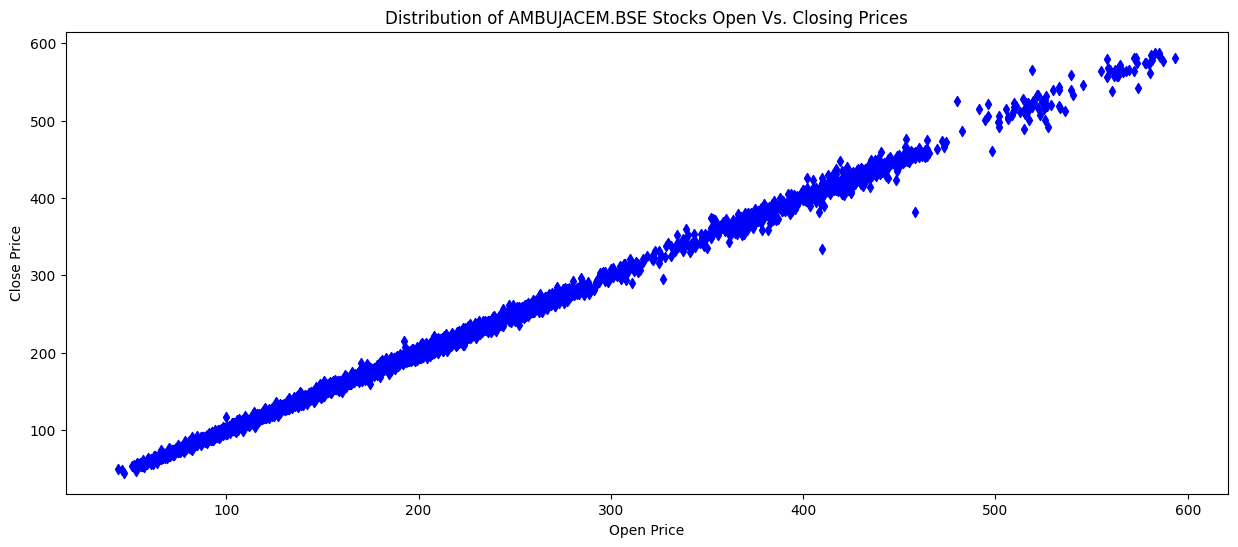

In [35]:
fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(data=df_ambuja, x= "open", y= "close", c="blue", marker="d", s=26)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Distribution of AMBUJACEM.BSE Stocks Open Vs. Closing Prices");

# Defensive Programming

Defensive programming is the practice of writing code which will continue to function, even if something goes wrong. We'll never be able to foresee all the problems people might run into with our code, but we can take steps to make sure things don't fall apart whenever one of those problems happens. 

So far, we've made API requests where everything works. But coding errors and problems with servers are common, and they can cause big issues in a data science project. Let's see how our `response` changes when we introduce common bugs in our code. 

**Task 8.1.16:** Return to <a href="#task-815">Task 8.1.5</a> and change the first part of your URL. Instead of `"query"`, use `"search"` (a path that doesn't exist). Then rerun your code for all the tasks that follow. What changes? What stays the same?

We know what happens when we try to access a bad address. But what about when we access the *right* path with a *bad* ticker symbol?

**Task 8.1.17:** Return to <a href="#task-815">Task 8.1.5</a> and change the ticker symbol from `"AMBUJACEM.BSE"` to `"RAMBUJACEM.BSE"` (a company that doesn't exist). Then rerun your code for all the tasks that follow. Again, take note of what changes and what stays the same.

Let's formalize our extraction and transformation process for the AlphaVantage API into a reproducible function.

**Task 8.1.18:** Build a `get_daily` function that gets data from the AlphaVantage API and returns a clean DataFrame. Use the docstring as guidance. When you're satisfied with the result, submit your work to the grader. 

- [What's a function?](../%40textbook/02-python-advanced.ipynb#Functions)
- [Write a function in Python.](../%40textbook/02-python-advanced.ipynb#Functions)

In [38]:
def get_daily(ticker, output_size= "full"):

    """Get daily time series of an equity from AlphaVantage API.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the equity.
    output_size : str, optional
        Number of observations to retrieve. "compact" returns the
        latest 100 observations. "full" returns all observations for
        equity. By default "full".

    Returns
    -------
    pd.DataFrame
        Columns are 'open', 'high', 'low', 'close', and 'volume'.
        All are numeric.
    """
    # Create URL (8.1.5)
    url = (
        "https://www.alphavantage.co/query?"
        "function=TIME_SERIES_DAILY&"
        f"symbol={ticker}&"
        f"outputsize={output_size}&"
        f"datatype={data_type}&"
        f"apikey={settings.alpha_api_key}"
        )

    # Send request to API (8.1.6)
    response = requests.get(url=url)

    # Extract JSON data from response (8.1.10)
    response_data = response.json()
    
    if "Time Series (Daily)" not in response_data:
        raise Exception(
        f"Invalid API Call: Ckeck that ticker symbol '{ticker}' is correct"
        )
    # Read data into DataFrame (8.1.12 & 8.1.13)
    stock_data = response_data["Time Series (Daily)"]
    df = pd.DataFrame.from_dict(stock_data, orient="index", dtype=float)

    # Convert index to `DatetimeIndex` named "date" (8.1.14)
    df.index = pd.to_datetime(df.index)
    df.index.name = "date"

    # Remove numbering from columns (8.1.15)
    df.columns = [c.split(". ")[1] for c in df.columns]

    # Return DataFrame
    return df

In [39]:
# Test your function
df_ambuja = get_daily(ticker="AMBUJACEM.BSE")

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4658 entries, 2023-11-29 to 2005-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4658 non-null   float64
 1   high    4658 non-null   float64
 2   low     4658 non-null   float64
 3   close   4658 non-null   float64
 4   volume  4658 non-null   float64
dtypes: float64(5)
memory usage: 218.3 KB
None


,open,high,low,close,volume
date,,,,,
2023-11-29,434.05,437.10,428.15,435.55,354642.0
2023-11-28,415.65,435.40,415.65,431.20,255414.0
2023-11-24,414.85,415.55,411.35,413.75,90573.0
2023-11-23,414.40,416.75,408.60,415.50,93005.0
2023-11-22,419.15,420.85,413.15,414.30,38283.0


How does this function deal with the two bugs we've explored in this section? Our first error, a bad URL, is something we don't need to worry about. No matter what the user inputs into this function, the URL will always be correct. But see what happens when the user inputs a bad ticker symbol. What's the error message? Would it help the user locate their mistake?

**Task 8.1.19:** Add an `if` clause to your `get_daily` function so that it throws an `Exception` when a user supplies a bad ticker symbol. Be sure the error message is informative.

- [What's an Exception?](../%40textbook/02-python-advanced.ipynb#Error-Handling)
- [Raise an Exception in Python.](../%40textbook/02-python-advanced.ipynb#Raising-Errors)

In [40]:
# Test your Exception
df_test = get_daily(ticker="ABUJACEM.BSE")

Exception: Invalid API Call: Ckeck that ticker symbol 'ABUJACEM.BSE' is correct

Alright! We now have all the tools we need to get the data for our project. In the next lesson, we'll make our AlphaVantage code more reusable by creating a `data` module with class definitions. We'll also create the code we need to store and read this data from our application database.